# Multiple Regression Model

## Data Pre-Processing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Data Set

In [3]:
ds = pd.read_csv('ifood_df.csv')
ds.info()
ds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


#### education_Master and education_2n Cycle are equivalent things, so we merge them into one column:

In [5]:
sum_cols = ds['education_2n Cycle'] + ds['education_Master']
ds['education_Master'] = sum_cols
ds.drop('education_2n Cycle',axis=1,inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

#### Based on the data of customers, we want to predict the total amount spent by them, so we keep the relevant columns only

In [7]:
X=ds[ds.columns[~ds.columns.isin(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
                                  'MntGoldProds','Z_CostContact','Z_Revenue', 'MntTotal','MntRegularProds'])]]
X.info()
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   NumDealsPurchases     2205 non-null   int64  
 5   NumWebPurchases       2205 non-null   int64  
 6   NumCatalogPurchases   2205 non-null   int64  
 7   NumStorePurchases     2205 non-null   int64  
 8   NumWebVisitsMonth     2205 non-null   int64  
 9   AcceptedCmp3          2205 non-null   int64  
 10  AcceptedCmp4          2205 non-null   int64  
 11  AcceptedCmp5          2205 non-null   int64  
 12  AcceptedCmp1          2205 non-null   int64  
 13  AcceptedCmp2          2205 non-null   int64  
 14  Complain              2205 non-null   int64  
 15  Response             

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_Basic,education_Graduation,education_Master,education_PhD,AcceptedCmpOverall
0,58138.0,0,0,58,3,8,10,4,7,0,...,0,0,1,0,0,0,1,0,0,0
1,46344.0,1,1,38,2,1,1,2,5,0,...,0,0,1,0,0,0,1,0,0,0
2,71613.0,0,0,26,1,8,2,10,4,0,...,0,0,0,1,0,0,1,0,0,0
3,26646.0,1,0,26,2,2,0,4,6,0,...,0,0,0,1,0,0,1,0,0,0
4,58293.0,1,0,94,5,5,3,6,5,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,2,9,3,4,5,0,...,0,1,0,0,0,0,1,0,0,0
2201,64014.0,2,1,56,7,8,2,5,7,0,...,0,0,0,1,0,0,0,0,1,1
2202,56981.0,0,0,91,1,2,3,13,6,0,...,1,0,0,0,0,0,1,0,0,1
2203,69245.0,0,1,8,2,6,5,10,3,0,...,0,0,0,1,0,0,0,1,0,0


In [9]:
y = ds.iloc[:, 35:36].values
y

array([[1529],
       [  21],
       [ 734],
       ...,
       [1217],
       [ 782],
       [ 151]], dtype=int64)

### Splitting the Data Set into Training Set and Test Set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

## Training the Model

### Training the Multiple Linear Regression Model on the Training Data Set

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test Results

In [15]:
y_pred = regressor.predict(X_test)

## Visualising the Results

### Predicted Amount Spend vs True Amount Spend for Test Data

In [17]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 6.24901888e+02  3.99000000e+02]
 [-1.21772182e+02  1.60000000e+01]
 [ 1.01529767e+03  6.62000000e+02]
 [ 4.42514590e+02  2.29000000e+02]
 [ 5.15904999e+02  3.51000000e+02]
 [ 9.39789232e+02  8.41000000e+02]
 [ 1.46600452e+03  1.60700000e+03]
 [ 1.34618012e+03  1.27700000e+03]
 [ 1.95424529e+02  1.89000000e+02]
 [ 3.72809627e+02  2.69000000e+02]
 [ 1.01943109e+03  1.28700000e+03]
 [ 1.72893210e+03  2.07400000e+03]
 [ 1.04332078e+03  1.14000000e+03]
 [ 6.11674089e+02  1.20600000e+03]
 [ 1.76779376e+02  7.00000000e+01]
 [ 9.31830110e+02  1.22000000e+03]
 [-3.51245583e+01  5.00000000e+01]
 [ 1.38759805e+03  1.56600000e+03]
 [ 1.13189910e+03  1.27900000e+03]
 [-4.04015151e+01  3.90000000e+01]
 [ 3.89396131e+02  5.37000000e+02]
 [ 9.71846620e+02  8.33000000e+02]
 [ 1.05585937e+03  1.20500000e+03]
 [-5.82701497e+01  1.11000000e+02]
 [ 9.13960452e+01  6.70000000e+01]
 [ 9.82893394e+02  1.03000000e+03]
 [ 1.27822303e+02  4.30000000e+01]
 [ 9.15011459e+02  7.36000000e+02]
 [-1.37052000e+02  2

### Amount vs Income plot for Training Set Data

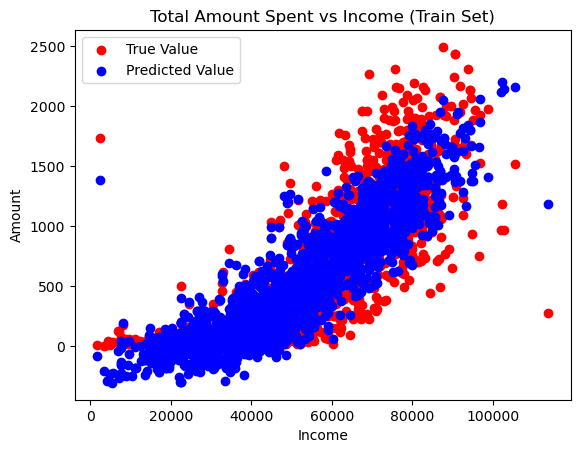

In [19]:
plt.scatter(X_train.iloc[:, 0:1].values.ravel(), y_train, c='r', label='True Value')
plt.scatter(X_train.iloc[:, 0:1].values.ravel(), regressor.predict(X_train), c='b', label='Predicted Value')
plt.title("Total Amount Spent vs Income (Train Set)")
plt.xlabel("Income")
plt.ylabel("Amount")
plt.legend()
plt.show()

### Amount vs Income Plot for Test Set Data

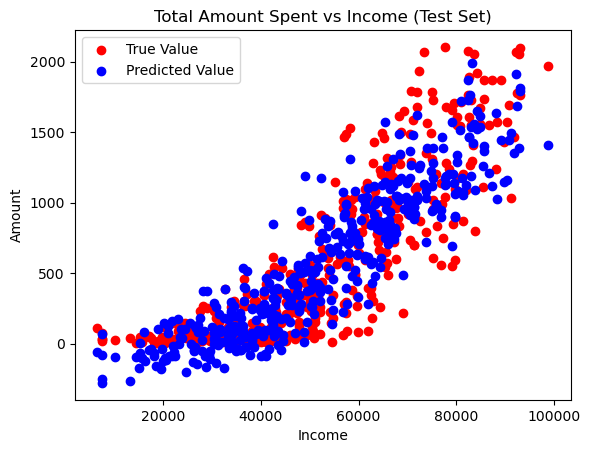

In [21]:
plt.scatter(X_test.iloc[:, 0:1].values.ravel(), y_test, c='r', label='True Value')
plt.scatter(X_test.iloc[:, 0:1].values.ravel(), regressor.predict(X_test), c='b', label='Predicted Value')
plt.title("Total Amount Spent vs Income (Test Set)")
plt.xlabel("Income")
plt.ylabel("Amount")
plt.legend()
plt.show()

### Amount vs Recency for Train Set

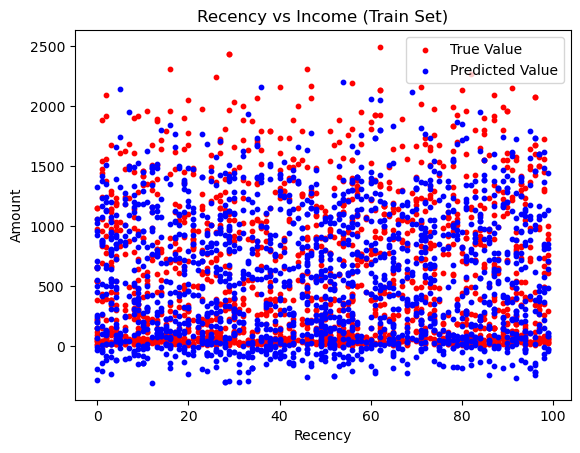

In [23]:
plt.scatter(X_train.iloc[:, 3:4].values.ravel(), y_train, c='r', label='True Value',s=10)
plt.scatter(X_train.iloc[:, 3:4].values.ravel(), regressor.predict(X_train), c='b', label='Predicted Value',s=10)
plt.title("Recency vs Income (Train Set)")
plt.xlabel("Recency")
plt.ylabel("Amount")
plt.legend()
plt.show()

### Amount vs Recency for Test Set

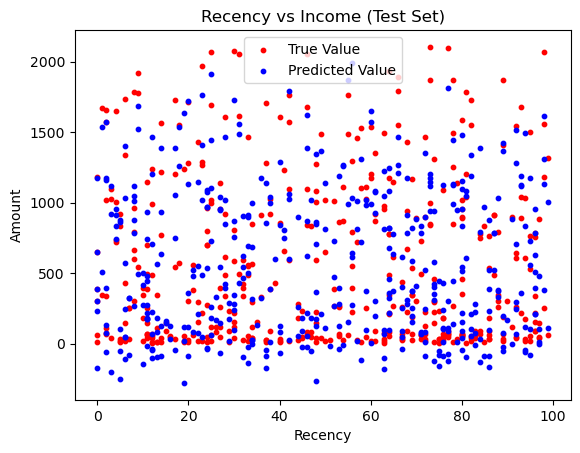

In [25]:
plt.scatter(X_test.iloc[:, 3:4].values.ravel(), y_test, c='r', label='True Value',s=10)
plt.scatter(X_test.iloc[:, 3:4].values.ravel(), regressor.predict(X_test), c='b', label='Predicted Value',s=10)
plt.title("Recency vs Income (Test Set)")
plt.xlabel("Recency")
plt.ylabel("Amount")
plt.legend()
plt.show()

## Performance of the Model

### Evaluating the Model Performance

In [14]:
import statsmodels.api as sm
result = sm.OLS(y_test, y_pred).fit()
print('R-squared Value:',result.rsquared,'\nR-squared Adjusted Value', result.rsquared_adj)

R-squared Value: 0.9230697557479568 
R-squared Adjusted Value 0.9228949142837476
